## Исследование данных о российском кинопрокате

В данном исследовании мы изучим рынок российского кинопроката, чтобы выявить текущие тренды. 

Будем работать с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск. Данные хранятся в двух файлах: в одном данные о прокатных удостоверениях, во втором – данные о прокате в российских кинотеатрах.

Проведем предобработку данных, затем изучим, сколько фильмов выходило в прокат каждый год, как менялась динамика проката по годам. Определим, влияет ли возрастное ограничение аудитории на сборы фильма в прокате. Посмотрим, есть ли связь между бюджетом фильма, его сборами и рейтингом.

Отдельно исследуем фильмы, которые получили государственную поддержку. Будем искать интересные закономерности в данных. Сколько выделяют средств на поддержку кино, хорошо ли окупаются такие фильмы, какой у них рейтинг.

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 


In [100]:
# импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 10000)

#### Выгрузка данных из файлов

In [101]:
# откроем файл с данными о прокатных удостоверениях и изучим его
movies = pd.read_csv('/datasets/mkrf_movies.csv')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [102]:
movies.head(5)

title   puNumber           show_start_date            type  \
0      Открытый простор  221048915  2015-11-27T12:00:00.000Z  Художественный   
1  Особо важное задание  111013716  2016-09-13T12:00:00.000Z  Художественный   
2          Особо опасен  221038416  2016-10-10T12:00:00.000Z  Художественный   
3          Особо опасен  221026916  2016-06-10T12:00:00.000Z  Художественный   
4          Особо опасен  221030815  2015-07-29T12:00:00.000Z  Художественный   

                                         film_studio production_country  \
0  Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...                США   
1                              Киностудия "Мосфильм"               СССР   
2  Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...                США   
3  Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...                США   
4  Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...                США   

            director                                           producer  \
0      Кевин Костнер          Дэвид Валдес, Кевин Костнер, Джейк Эбертс   
1          Е.Матвеев                                                NaN   
2  Тимур Бекмамбетов  Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит   
3  Тимур Бекмамбетов  Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит   
4  Тимур Бекмамбетов  Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит   

                 age_restriction  refundable_support  nonrefundable_support  \
0    «18+» - запрещено для детей                 NaN                    NaN   
1  «6+» - для детей старше 6 лет                 NaN                    NaN   
2    «18+» - запрещено для детей                 NaN                    NaN   
3    «18+» - запрещено для детей                 NaN                    NaN   
4    «18+» - запрещено для детей                 NaN                    NaN   

   budget financing_source ratings                     genres  
0     NaN              NaN     7.2     боевик,драма,мелодрама  
1     NaN              NaN     6.6              драма,военный  
2     NaN              NaN     6.8  фантастика,боевик,триллер  
3     NaN              NaN     6.8  фантастика,боевик,триллер  
4     NaN              NaN     6.8  фантастика,боевик,триллер

In [103]:
# откроем файл с данными о сборах и изучим его
shows = pd.read_csv('/datasets/mkrf_shows.csv')

In [104]:
shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [105]:
shows.head()

puNumber    box_office
0  111000113  2.450000e+03
1  111000115  6.104000e+04
2  111000116  1.530300e+08
3  111000117  1.226096e+07
4  111000118  1.636841e+08

Для дальнейшей работы нужно соединить два датафрейма. Они имеют общий столбец puNumber. Будем объединять по нему. В таблице shows этот столбец имеет тип int64, а в таблице movies – object. Преобразуем его к целочисленному типу.

In [106]:
movies[~movies['puNumber'].str.isdigit()]

title    puNumber           show_start_date  \
804               Паранормальный Якутск   111004112  2012-08-24T12:00:00.000Z   
1797  Курбан-роман. (История с жертвой)         нет  2014-05-15T12:00:00.000Z   

                type       film_studio production_country    director  \
804   Художественный  ИП Тимофеев К.П.             Россия  К.Тимофеев   
1797  Художественный  ФОНД "ИННОВАЦИЯ"             Россия     С.Юзеев   

        producer                  age_restriction  refundable_support  \
804          NaN  «16+» - для детей старше 16 лет                 NaN   
1797  М.Галицкая  «12+» - для детей старше 12 лет                 NaN   

      nonrefundable_support  budget financing_source ratings genres  
804                     NaN     NaN              NaN     NaN    NaN  
1797                    NaN     NaN              NaN     NaN    NaN

In [107]:
# посмотрим, почему в строке 804 значение не числовое 
temp = movies.loc[804, 'puNumber']
temp

' 111004112'

In [108]:
# уберем пробел в начале строки
movies.loc[804, 'puNumber'] = temp[1:]
movies.loc[804, 'puNumber']

'111004112'

In [109]:
# Так как мы не сможем без номера прокатного удостоверения соединить данные о фильме 
# и о размере сборов, удалим эту строку. 
movies = movies.query('puNumber != "нет"')

In [110]:
# приводим к целочисленному типу
movies['puNumber'] = movies['puNumber'].astype(int)

In [111]:
# Соединяем два датафрейма так, чтобы в итоговый обязательно вошли все строки датафрейма movies
movies = movies.merge(shows, on='puNumber', how='left')
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

#### Итоги предварительного знакомства с данными

Данные собраны в один датасет из двух источников. Для этого в данных о прокатных сборах исправлены опечатки и изменен тип столбца с номером прокатного удостоверения.

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

Преобразуем столбец с датой премьеры фильма к типу datetime

In [112]:
movies['show_start_date'] = pd.to_datetime(
    movies['show_start_date'],
    format='%Y-%m-%dT%H:%M:%S.000Z',
    utc=None
)

А столбец с рейтингом фильма – к вещественному типу.

In [113]:
# посмотрим, какие значения хранятся в столбце ratings
movies['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

Видим, что для некоторых фильмов рейтинг указан в процентах. Такой рейтинг можно привести к принятому в Кинопоиске 10-тибальному. Для этого удалим знак % и полученное число разделим на 10

In [114]:
# пересчитываем рейтинг
movies.loc[movies['ratings'].str.find('%')>-1, 'ratings'] =\
movies.loc[movies['ratings'].str.find('%')>-1, 'ratings'].str.strip('%').astype(int) / 10

In [115]:
# приведем значения к вещественному типу и проверим результат
movies['ratings'] = movies['ratings'].astype(float)
movies['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

In [116]:
# изменим тип столбца с возрастной категорией на категориальный и изменим порядок с алфавитного на сортировку по возрасту
movies['age_restriction'] = movies['age_restriction'].astype('category')
age_restriction_cats = [
    '«0+» - для любой зрительской аудитории',
    '«6+» - для детей старше 6 лет',
    '«12+» - для детей старше 12 лет',
    '«16+» - для детей старше 16 лет',
    '«18+» - запрещено для детей'
]
movies['age_restriction'] = movies['age_restriction'].cat.reorder_categories(age_restriction_cats, ordered=True)

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [117]:
movies.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                   966
genres                    975
box_office               4327
dtype: int64

В столбце о стране производства всего два пропуска. Посмотрим, какие это фильмы. 

In [118]:
movies.query('production_country.isna()')

title   puNumber  \
3185  Детский юмористический киножурнал "Ералаш. Ну ...  111001216   
4440                           Мульт личности. Выпуск 5  214000410   

         show_start_date            type                      film_studio  \
3185 2016-02-09 12:00:00  Художественный  ООО "Продюсерский центр ЕРАЛАШ"   
4440 2010-01-25 12:00:00  Художественный                              NaN   

     production_country                                           director  \
3185                NaN  Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...   
4440                NaN                                                NaN   

                             producer                         age_restriction  \
3185  ООО "Продюсерский центр ЕРАЛАШ"  «0+» - для любой зрительской аудитории   
4440                              NaN  «0+» - для любой зрительской аудитории   

      refundable_support  nonrefundable_support  budget financing_source  \
3185                 NaN                    NaN     NaN              NaN   
4440                 NaN                    NaN     NaN              NaN   

      ratings              genres  box_office  
3185      7.2     детский,комедия    194527.0  
4440      4.0  мультфильм,комедия         NaN

In [119]:
# уточним полные названия
movies.loc[3185, 'title'], movies.loc[4440, 'title']

('Детский юмористический киножурнал "Ералаш. Ну просто фантазтика!"',
 'Мульт личности. Выпуск 5')

Эти пропуски можно заполнить вручную данными с сайта КиноПоиска. По полным названиям удалось выяснить, что оба фильма сняты в России.

In [120]:
movies.loc[movies['production_country'].isna(), 'production_country'] = 'Россия'
movies['production_country'].isna().sum()

0

In [121]:
movies.query('director.isna()')

title   puNumber  \
764   Три звезды. Концерт в Waldbuhne Theater, Берли...  126003512   
1735                           Помпеи. Британский музей  126003413   
3839                     Зур концерт (Большой концерт).  217027010   
4051  Ганс Сэйфуллин "Авылым чишмэлэре. Ганс Сэйфулл...  217017310   
4297                        Изге Вэли (Святой Валентин)  217020610   
4414                          Bon Jovi. The Circle Tour  126001710   
4440                           Мульт личности. Выпуск 5  214000410   
4922  Георг Фридрих Гендель. Мессия. Оратория. Корол...  126001111   
4941             Питер Гэбриэл и New Blood Orchestra 3D  126002711   

         show_start_date            type                   film_studio  \
764  2012-12-04 12:00:00          Прочие            Райзинг Алтернатив   
1735 2013-09-11 12:00:00          Прочие  МортуСкрин, Британский музей   
3839 2010-06-24 12:00:00  Художественный            ООО "Барс Рекордс"   
4051 2010-04-22 12:00:00  Художественный            ООО "Барс-Рекордс"   
4297 2010-05-20 12:00:00  Художественный            ООО "Барс Рекордс"   
4414 2010-11-11 12:00:00          Прочие     Эншутц Интертейнмент Груп   
4440 2010-01-25 12:00:00  Художественный                           NaN   
4922 2011-04-25 12:00:00          Прочие                      Опус Арт   
4941 2011-11-11 12:00:00          Прочие               Омниверс Визион   

     production_country director                      producer  \
764      Великобритания      NaN               Вальдбюне Театр   
1735     Великобритания      NaN              Британский музей   
3839             Россия      NaN                           NaN   
4051             Россия      NaN                           NaN   
4297             Россия      NaN                           NaN   
4414                США      NaN     Эншутц Интертейнмент Груп   
4440             Россия      NaN                           NaN   
4922     Великобритания      NaN  Короевский колледж Кембриджа   
4941     Великобритания      NaN               Омниверс Визион   

                             age_restriction  refundable_support  \
764   «0+» - для любой зрительской аудитории                 NaN   
1735  «0+» - для любой зрительской аудитории                 NaN   
3839         «12+» - для детей старше 12 лет                 NaN   
4051  «0+» - для любой зрительской аудитории                 NaN   
4297         «12+» - для детей старше 12 лет                 NaN   
4414  «0+» - для любой зрительской аудитории                 NaN   
4440  «0+» - для любой зрительской аудитории                 NaN   
4922  «0+» - для любой зрительской аудитории                 NaN   
4941  «0+» - для любой зрительской аудитории                 NaN   

      nonrefundable_support  budget financing_source  ratings  \
764                     NaN     NaN              NaN      NaN   
1735                    NaN     NaN              NaN      NaN   
3839                    NaN     NaN              NaN      NaN   
4051                    NaN     NaN              NaN      NaN   
4297                    NaN     NaN              NaN      NaN   
4414                    NaN     NaN              NaN      7.9   
4440                    NaN     NaN              NaN      4.0   
4922                    NaN     NaN              NaN      NaN   
4941                    NaN     NaN              NaN      6.7   

                  genres  box_office  
764                  NaN     44350.0  
1735                 NaN         NaN  
3839                 NaN         NaN  
4051                 NaN         NaN  
4297                 NaN         NaN  
4414      концерт,музыка         NaN  
4440  мультфильм,комедия         NaN  
4922                 NaN         NaN  
4941      концерт,музыка         NaN

Пропуски в данных о режиссере можно исправить только для сериала Мульт личности. Остальные фильмы без указанного режиссера –записи либо концертов, либо шоу. Их заполнять не будем.

In [122]:
movies.loc[4440, 'director'] = 'Василий Пичул, Юрий Владовский'

In [123]:
movies.query('refundable_support.isna() or nonrefundable_support.isna() or budget.isna()')['title'].count()

7153

Так как данные о возвратных и невозвратных средствах не заполнены одновременно с данными о бюджете фильмов, то пропуски заполнить каким-либо медианным значением мы не сможем. Удалить эти строки – значит удалить 95,6% данных - или все данные о фильмах, снятых без господдержки. Следовательно, оставляем как есть.

Остальные пропуски лучше тоже оставить так как есть, потому что нельзя предложить замену, которая давала бы достоверные данные (такие столбцы, как имя продюсера или рейтинг).

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

Прежде, чем искать дубликаты, удалим опечатки в названиях фильмов

In [124]:
# функция, удаляющая опечатки в названии фильма
def clean_title(row):
    replacement = {
        'Ё': 'Е',
        'ё': 'е',
        '....': '...',
        ' ...': '...',
        ' !': '!',
        ' ?': '?'
    }
    dirt = [
        '  _',
        ' __',
        ' _',
        ' -',
        '      .',
        '. _',
        '_ ',
        '. ',
        '- ',
        '__',
        '-',
        '_',
        ' .',
        ' '
    ]
    legal_dots_in_the_end = [
        '...',
        '!..',
        '?..'
    ]
    try:
        for key in replacement:
            if key in row:
                row = row.replace(key, replacement[key])
        
        for issue in dirt:
            if row[-len(issue):] == issue:
                row = row[:-len(issue)]
                
        if row[-1] == '.':
            if row[-3:] not in legal_dots_in_the_end:
                row = row[:-1]
        return row
    except:
        return row

In [125]:
# очистим названия фильмов от опечаток
movies['title'] = movies['title'].apply(clean_title)

In [126]:
# посмотрим, сколько всего фильмов описано в данных
movies.shape[0]

7485

Дубликатами по столбцу title отмечены строки, которые повторяют название. Но из всех дубликатов данные о сборах есть только в одной строке, и она не всегда в датафрейме встречается раньше своих дубликатов. Поэтому выберем повторяющиеся по двум столбцам: title и box_office. Их можно удалить, но при этом не пропадут данные о сборах.

In [127]:
movies = movies.drop_duplicates(subset=['title', 'box_office'], keep=False).reset_index(drop=True)

In [128]:
# посмотрим, сколько фильмов осталось после удаления дубликатов
movies.shape [0]

6493

Дубликаты возникли по следующей причине: прокатное удостоверение дается на определенный период, когда он заканчивается, нужно получать новое удостоверение. В данных появляется новая строка, которая отличается от предыдущей только номером удостоверения.

In [129]:
# посмотрим, есть ли дубликаты в столбце названием
movies[movies['title'].duplicated(keep=False)]['title'].shape[0]

397

In [130]:
# посмотрим, есть ли дубликаты в столбце с номером прокатного удостоверения
movies[movies['puNumber'].duplicated()].shape[0]

0

In [131]:
# посмотрим, как выглядят строки с дублирующимися названиями
movies[movies['title'].duplicated(keep=False)]

title   puNumber  \
77                                              Выстрел  111013613   
96    Гарри Поттер и тайная комната /По роману Дж.К....  121026016   
98    Гарри Поттер и философский камень /По роману Д...  121025916   
203                                          На колесах  221012115   
208                                            Мученицы  121016416   
275   Гарри Поттер и Принц-полукровка /По роману Дж....  121026416   
291                                        Мертвые души  111029714   
300   Гарри Поттер и Дары Смерти - Часть 1/По роману...  121026516   
301   Гарри Поттер и Дары Смерти - Часть 2 /По роман...  121026616   
302                         Ариэтти из страны лилипутов  124001816   
303                   Агент Джонни Инглиш: Перезагрузка  221000112   
304                                Рожденные на воле 3D  126003416   
358                                       Отважная Лифи  124001616   
359                                       Отважная Лифи  124000512   
365                               На глубине морской 3D  122000312   
434   Сумерки. Сага: Рассвет - Часть 1 /По произведе...  221038513   
435                                   Игра на выживание  121003312   
440                                              Золото  111001912   
465                                   Свадебный разгром  121012816   
466                                   Свадебный разгром  121004612   
535                                          Неуловимые  121005513   
580                          Любовь на кончиках пальцев  121014016   
581                          Любовь на кончиках пальцев  121033312   
586                                   Параллельные миры  111005712   
616                                              Мебиус  121007313   
645                              Родительский беспредел  221043213   
646                              Родительский беспредел  121031912   
657                                          Арктика 3D  126003112   
658                                          Арктика 3D  126004514   
659                                          Арктика 3D  126003016   
661                                              Экипаж  121027612   
662                                               Жизнь  121018112   
678                                     Гладиаторы Рима  124004012   
701                                             Джунгли  111005612   
706                                    Волшебная страна  124003016   
707                                    Волшебная страна  124001113   
780                                  Монстры на острове  124000413   
781                                  Монстры на острове  124002515   
784                                              Измена  111003612   
794                                     Папа - досвидос  121012412   
795                                     Папа - досвидос  221035012   
807                                       Третий лишний  121016012   
808                                       Третий лишний  221077912   
826             Жизнь Пи /По произведению Янна Мартела/  221041413   
827             Жизнь Пи /По произведению Янна Мартела/  121029812   
835                                        Шаг вперед 4  221038913   
836                                        Шаг вперед 4  121016712   
865                             Золушка: Полный вперед!  224001416   
866                             Золушка: Полный вперед!  124001612   
877                                      В поисках Немо  124002012   
878                                   Параллельные миры  121019912   
879                                      Средь бела дня  221021814   
880                                      Средь бела дня  121020012   
922                                     Ангел-хранитель  121002713   
926                         Пушистые против зубастых 3D  124002512   
927                         Пушистые против зубастых 3D  224024112   
931                                           Аэротачки  124

Информация о производстве фильма, жанре и возрастной категории совпадают по строкам для одного фильма. Сгруппируем строки по названиям фильмов и посмотрим данные о премьере, рейтинги и сборы.

In [132]:
for title in movies[movies['title'].duplicated(keep=False)]['title'].unique():
    print(title)
    print(movies[movies['title'] == title][['show_start_date', 'ratings','box_office']])
    print()

Выстрел
         show_start_date  ratings  box_office
77   2013-12-19 12:00:00      7.4      3040.0
5711 2019-02-20 12:00:00      7.4         NaN

Гарри Поттер и тайная комната /По роману Дж.К.Ролинг/
         show_start_date  ratings  box_office
96   2016-09-23 12:00:00      8.0   1093810.0
3783 2010-11-29 12:00:00      8.0         NaN

Гарри Поттер и философский камень /По роману Дж.К.Ролинг/
         show_start_date  ratings  box_office
98   2016-09-23 12:00:00      8.2   1948760.0
3612 2010-11-30 12:00:00      8.2         NaN

На колесах
         show_start_date  ratings  box_office
203  2015-04-03 12:00:00      7.8         NaN
5321 2018-10-11 12:00:00      7.8    674920.0

Мученицы
         show_start_date  ratings  box_office
208  2016-06-07 12:00:00      6.4     18600.0
6075 2019-07-03 12:00:00      6.4         NaN

Гарри Поттер и Принц-полукровка /По роману Дж.К.Ролинг/
         show_start_date  ratings  box_office
275  2016-09-23 12:00:00      7.7    883640.0
3782 2010-11-29 1

Видим, что в этих данных могут встречаться различия. Они связаны с тем, что прокатное удостоверение выдается на определенный период: дата премьеры не совпадает для всех дублирующихся названий фильмов. Поэтому отличаются и данные о кассовых сборах. Все эти данные важны для дальнейшего анализа, поэтому удалять эти стоки не будем.

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

К категориальным значениям относятся (помимо обработанных на предыдущем шаге названий фильмов) тип фильма, режиссер, название киностудии, страна-производитель, жанр и возрастная категория фильма.

In [133]:
movies['type'].value_counts()

Художественный                3626
 Художественный               1359
Анимационный                   790
Прочие                         389
Документальный                 274
Научно-популярный               53
Музыкально-развлекательный       1
 Анимационный                    1
Name: type, dtype: int64

In [134]:
# уберем пробелы в начале названий некоторых типов фильмов.
movies['type'] = movies['type'].str.strip()
movies['type'].value_counts()

Художественный                4985
Анимационный                   791
Прочие                         389
Документальный                 274
Научно-популярный               53
Музыкально-развлекательный       1
Name: type, dtype: int64

In [135]:
movies['director'].value_counts()

О.Семёнова                                                                                                                                                                                                           47
Д.Червяцов                                                                                                                                                                                                           15
Вуди Аллен                                                                                                                                                                                                           13
О.Семёнова                                                                                                                                                                                                           12
П.Смирнов                                                                                                                               

In [136]:
movies['film_studio'].value_counts()

Киностудия "Мосфильм"                                                                                                                                                                                                                                              327
ООО "Мульт в кино"                                                                                                                                                                                                                                                  57
Анимаккорд Лтд                                                                                                                                                                                                                                                      23
ООО "Мульт в кино"                                                                                                                                                                                                 

In [137]:
movies['production_country'].value_counts()

Россия                                                                                                1784
США                                                                                                   1621
СССР                                                                                                   331
Франция                                                                                                262
Великобритания                                                                                         230
Италия                                                                                                 129
Германия                                                                                                94
Япония                                                                                                  75
Испания                                                                                                 65
США - Великобритания                 

In [138]:
movies['genres'].value_counts()

драма                                      432
комедия                                    317
драма,мелодрама                            157
мелодрама,комедия                          157
драма,мелодрама,комедия                    148
драма,комедия                              139
триллер,драма,криминал                     114
боевик,триллер,драма                       112
документальный                              75
ужасы,триллер                               72
фантастика,боевик,триллер                   69
мультфильм,комедия,приключения              68
мультфильм,фэнтези,комедия                  67
ужасы,триллер,детектив                      64
ужасы                                       63
мелодрама                                   62
драма,криминал                              61
боевик,триллер,криминал                     51
комедия,мелодрама                           50
комедия,криминал                            49
триллер,драма                               44
фантастика,бо

In [139]:
movies['age_restriction'].value_counts()

«16+» - для детей старше 16 лет           2340
«12+» - для детей старше 12 лет           1428
«18+» - запрещено для детей               1360
«0+» - для любой зрительской аудитории     754
«6+» - для детей старше 6 лет              611
Name: age_restriction, dtype: int64

Практически во всех категориальных значениях внутри одной ячейки может храниться несколько значений. Они могут быть по-разному разделены между собой – запятой или тире. А это может затруднить анализ. Чтобы облегчить работу, вынесем первые значения столбцов с жанром фильма и именем режиссера в отдельные столбцы (потому что эти параметры оказывают влияние на количество просмотров).

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

В столбцах refundable_support и nonrefundable_support указаны дынные о возвратных и невозвратных средствах господдержки. Сумма этих столбцов не может быть больше общего бюджета фильма.

In [140]:
movies[movies['refundable_support'] + movies['nonrefundable_support'] > movies['budget']]

title   puNumber     show_start_date            type  \
1677                     14+  111023614 2014-12-19 12:00:00  Художественный   
1682               Дуxless 2  111000415 2015-01-26 12:00:00  Художественный   
2045             Воин (2015)  111017315 2015-09-28 12:00:00  Художественный   
2105                  Бармен  111009615 2015-05-26 12:00:00  Художественный   
2181     Савва. Сердце воина  114001715 2015-07-21 12:00:00    Анимационный   
2248          Тряпичный союз  111010215 2015-06-08 12:00:00  Художественный   
2346      Срочно выйду замуж  111017115 2015-09-30 12:00:00  Художественный   
2428       Помню - не помню!  111004916 2016-03-01 12:00:00  Художественный   
2599  Любовь с ограничениями  111008216 2016-04-29 12:00:00  Художественный   
3106       Притяжение (2016)  111018116 2016-12-16 12:00:00  Художественный   
3216                Чудо-юдо  114001817 2017-06-27 12:00:00    Анимационный   
3280                    Мифы  111004317 2017-06-07 12:00:00  Художественный   
4719                   Селфи  111012117 2018-02-01 12:00:00  Художественный   
4851              Два хвоста  114001018 2018-05-31 12:00:00    Анимационный   
5047      Принцесса и дракон  114003018 2018-08-23 12:00:00    Анимационный   
5356                Баба Яга  114006518 2018-11-08 12:00:00    Анимационный   
5845     Большое путешествие  114002419 2019-04-20 12:00:00    Анимационный   

                                            film_studio production_country  \
1677                         ООО Киностудия  "Сентябрь"             Россия   
1682  ООО "Киностудия "Слово", ООО "Арт Пикчерс Студия"             Россия   
2045   ООО "Форпост Продакшн", ООО "Арт Пикчерс Студия"             Россия   
2105          АО "ВайТ Медиа", ООО "Арт Пикчерс Студия"             Россия   
2181   ООО "Глюкоза Продакшн", ООО "Арт Пикчерс Студия"             Россия   
2248                      ООО "Кинокомпания "КОКТЕБЕЛЬ"             Россия   
2346          АО "ВайТ Медиа", ООО "Арт Пикчерс Студия"             Россия   
2428                                    ООО "КиноФирма"             Россия   
2599          АО "ВайТ Медиа", ООО "Арт Пикчерс Студия"             Россия   
3106      ООО "Водород 2011",  ООО "Арт Пикчерс Студия"             Россия   
3216                                    ООО "КиноФирма"             Россия   
3280           ООО "ХАЙПФИЛМ", ООО "Арт Пикчерс Студия"             Россия   
4719  ООО "Киностудия "Слово", ООО "Арт Пикчерс Студия"             Россия   
4851                          ООО "ЛИЦЕНЗИОННЫЕ БРЕНДЫ"             Россия   
5047                          ООО "ЛИЦЕНЗИОННЫЕ БРЕНДЫ"             Россия   
5356                           ООО "Арт Пикчерс Студия"             Россия   
5845                          ООО "ЛИЦЕНЗИОННЫЕ БРЕНДЫ"             Россия   

                            director  \
1677                        А.Зайцев   
1682                      Р.Прыгунов   
2045                     А.Андрианов   
2105                    Д.Штурманова   
2181                        М.Фадеев   
2248                     М.Местецкий   
2346                       С Чекалов   
2428                     В.Ровенский   
2599                         Д.Тюрин   
3106                     Ф.Бондарчук   
3216                       А.Лукичев   
3280                    А.Молочников   
4719                      Н.Хомерики   
4851  В.Ровенский, Н.Лопато, В.Азеев   
5047                      М.Нефедова   
5356                         В.Саков   
5845           Н.Лопато, В.Ровенский   

                                               producer  \
1677                                О.Гранина, А.Зайцев   
1682                 П.Ануров, Ф.Бондарчук, Д.Рудовский   
2045                           ООО "Арт Пикчерс Студия"   
2105                                        Т.Вайнштейн   
2181                                         А.Чистяков   
2248                              Р.Борисевич, А.Кушаев   
2346              Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский   
24

Бюджет фильма должен быть больше суммы возвратных и невозвратных средств господдержки. В данном случае бюджет не указан, и мы не сможем рассчитать какую долю от общего бюджета составляет господдержка. Поэтому удалим эти строки. 

Так как в данных о бюджете много пропусков, немного изменим вид условия, по которому будем удалять подозрительные строки: удалим те, в котрых бюджет равен 0.

In [141]:
# количество фильмов, для которых бюджет указан как нулевой
movies[movies['budget'] == 0].shape[0]

17

In [142]:
# оставим фильмы с ненулевым бюджетом
movies = movies[movies['budget'] != 0]

Перейдем к данным о сборах фильмов

In [143]:
# посмотрим, для какого числа фильмов есть данные о сборах
movies['box_office'].notna().sum() / movies.shape[0] * 100

48.50216182828907

In [144]:
# посмотрим на распределение значений в данных о сборах
movies['box_office'].describe()

count    3.141000e+03
mean     7.600967e+07
std      2.402503e+08
min      0.000000e+00
25%      8.395000e+04
50%      2.284862e+06
75%      2.344112e+07
max      3.073569e+09
Name: box_office, dtype: float64

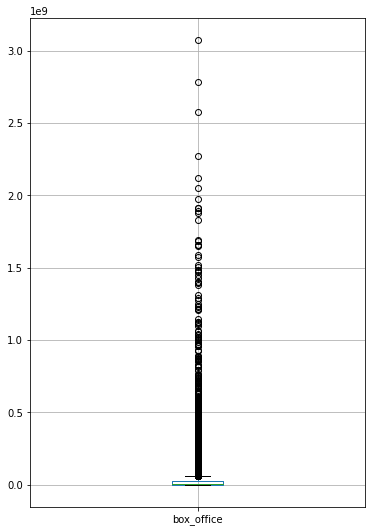

In [145]:
movies['box_office'].plot(
    kind='box',
    figsize=(6, 9),
    grid=True
);

In [146]:
# посчитаем количество фильмов с уровнем сборов, попавших в категорию выбросов
movies.query('box_office > 0.1*10**9').shape[0]

428

In [147]:
# узнаем, сколько это в процентах от общего числа фильмов
movies.query('box_office > 0.1*10**9').shape[0] / movies.shape[0] * 100

6.609017912291539

In [148]:
# посмотрим, сколько из них произведено при участии или в США
movies[movies['production_country'].str.contains("США")].query('box_office > 0.1*10**9').shape[0]

313

In [149]:
# посмотрим, сколько из них произведено при участии или в России
movies[movies['production_country'].str.contains("Россия")].query('box_office > 0.1*10**9').shape[0]

100

In [150]:
# сколько из них снято при поддержке государства
movies.query('box_office > 0.1*10**9 and production_country == "Россия"')['financing_source'].notna().sum()

75

Не более 7 % фильмов от общего числа, описанных в датасете, принесли нетипично большие сборы в прокате. 73 % из них сняты в США (или при их участии). 100 фильмов - 23 % - в России. Из этих ста фильмов 75 % сняты при поддержке государства.

Считаю, что данные о выбросах в этом случае удалять нельзя, потому что это негативно отразится на анализе.

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [151]:
movies['year'] = movies['show_start_date'].dt.year
movies.head()

title   puNumber     show_start_date            type  \
0      Открытый простор  221048915 2015-11-27 12:00:00  Художественный   
1  Особо важное задание  111013716 2016-09-13 12:00:00  Художественный   
2     Остановился поезд  111013816 2016-09-13 12:00:00  Художественный   
3       Любовь и голуби  111007013 2013-10-18 12:00:00  Художественный   
4     Любовь и сигареты  221074614 2014-12-29 12:00:00  Художественный   

                                         film_studio production_country  \
0  Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...                США   
1                              Киностудия "Мосфильм"               СССР   
2                              Киностудия "Мосфильм"               СССР   
3                              Киностудия "Мосфильм"               СССР   
4  Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...                США   

        director                                   producer  \
0  Кевин Костнер  Дэвид Валдес, Кевин Костнер, Джейк Эбертс   
1      Е.Матвеев                                        NaN   
2   В.Абдрашитов                                        NaN   
3      В.Меньшов                                        NaN   
4  Джон Туртурро                Джон Пенотти, Джон Туртурро   

                   age_restriction  refundable_support  nonrefundable_support  \
0      «18+» - запрещено для детей                 NaN                    NaN   
1    «6+» - для детей старше 6 лет                 NaN                    NaN   
2    «6+» - для детей старше 6 лет                 NaN                    NaN   
3  «12+» - для детей старше 12 лет                 NaN                    NaN   
4      «18+» - запрещено для детей                 NaN                    NaN   

   budget financing_source  ratings                    genres  box_office  \
0     NaN              NaN      7.2    боевик,драма,мелодрама         NaN   
1     NaN              NaN      6.6             драма,военный         NaN   
2     NaN              NaN      7.7                     драма         NaN   
3     NaN              NaN      8.3         мелодрама,комедия      2700.0   
4     NaN              NaN      6.6  мюзикл,мелодрама,комедия         NaN   

   year  
0  2015  
1  2016  
2  2016  
3  2013  
4  2014

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

In [152]:
def first_in_a_bunch(bunch):
    try:
        if ',' in bunch:
            return bunch[:bunch.find(',')]
        else:
            return bunch
    except:
        return bunch

In [153]:
movies['head_director'] = movies['director'].apply(first_in_a_bunch)
movies['head_genre'] = movies['genres'].apply(first_in_a_bunch)
movies.head()

title   puNumber     show_start_date            type  \
0      Открытый простор  221048915 2015-11-27 12:00:00  Художественный   
1  Особо важное задание  111013716 2016-09-13 12:00:00  Художественный   
2     Остановился поезд  111013816 2016-09-13 12:00:00  Художественный   
3       Любовь и голуби  111007013 2013-10-18 12:00:00  Художественный   
4     Любовь и сигареты  221074614 2014-12-29 12:00:00  Художественный   

                                         film_studio production_country  \
0  Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...                США   
1                              Киностудия "Мосфильм"               СССР   
2                              Киностудия "Мосфильм"               СССР   
3                              Киностудия "Мосфильм"               СССР   
4  Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...                США   

        director                                   producer  \
0  Кевин Костнер  Дэвид Валдес, Кевин Костнер, Джейк Эбертс   
1      Е.Матвеев                                        NaN   
2   В.Абдрашитов                                        NaN   
3      В.Меньшов                                        NaN   
4  Джон Туртурро                Джон Пенотти, Джон Туртурро   

                   age_restriction  refundable_support  nonrefundable_support  \
0      «18+» - запрещено для детей                 NaN                    NaN   
1    «6+» - для детей старше 6 лет                 NaN                    NaN   
2    «6+» - для детей старше 6 лет                 NaN                    NaN   
3  «12+» - для детей старше 12 лет                 NaN                    NaN   
4      «18+» - запрещено для детей                 NaN                    NaN   

   budget financing_source  ratings                    genres  box_office  \
0     NaN              NaN      7.2    боевик,драма,мелодрама         NaN   
1     NaN              NaN      6.6             драма,военный         NaN   
2     NaN              NaN      7.7                     драма         NaN   
3     NaN              NaN      8.3         мелодрама,комедия      2700.0   
4     NaN              NaN      6.6  мюзикл,мелодрама,комедия         NaN   

   year  head_director head_genre  
0  2015  Кевин Костнер     боевик  
1  2016      Е.Матвеев      драма  
2  2016   В.Абдрашитов      драма  
3  2013      В.Меньшов  мелодрама  
4  2014  Джон Туртурро     мюзикл

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

Для расчета доли господдержки в бюджете фильма сложим данные об объемах возвратных и невозвратных средств и разделим их на общий бюджет фильма.

In [154]:
movies['gov_share'] =\
(movies['refundable_support'] + movies['nonrefundable_support']) / movies['budget']

In [155]:
# посмотрим на результаты расчетов
movies.query('budget.notna()').head(10)

title   puNumber  \
1001                              Пока еще жива  111005313   
1143                        Бесславные придурки  111003314   
1186                                  Невидимки  111004213   
1207                                      БЕРЦЫ  111004314   
1447                                   Братья Ч  111004414   
1501  Тайна Сухаревой башни. Чародей равновесия  114000115   
1516                      А зори здесь тихие...  111002915   
1517                                Две женщины  111013714   
1546                                   Призрак_  111001815   
1553                                     Ведьма  111002215   

         show_start_date            type  \
1001 2013-10-11 12:00:00  Художественный   
1143 2014-03-28 12:00:00  Художественный   
1186 2013-09-10 12:00:00  Художественный   
1207 2014-05-05 12:00:00  Художественный   
1447 2014-04-23 12:00:00  Художественный   
1501 2015-02-18 12:00:00    Анимационный   
1516 2015-03-16 12:00:00  Художественный   
1517 2014-10-02 12:00:00  Художественный   
1546 2015-03-02 12:00:00  Художественный   
1553 2015-03-05 12:00:00  Художественный   

                                            film_studio  \
1001  АНО содействия развитию кинематографии "Ангел-...   
1143                         ООО "Компания "АТК-Студио"   
1186                        ООО "Компания "РЕАЛ-ДАКОТА"   
1207                             ООО "Студия "Пассажир"   
1447                             ООО "Студия "Пассажир"   
1501                        ООО "Студия "Мастер-Фильм"    
1516                        ООО "Компания "Реал-Дакота"   
1517  ООО "Продюсерский Центр "Хорошо Продакшн", Rez...   
1546                                 ООО "Водород 2011"   
1553                         ООО "Кинокомпания "Ракурс"   

           production_country                              director  \
1001                   Россия                            А.Атанесян   
1143                   Россия                             А.Якимчук   
1186                   Россия              Р.Давлетьяров, С.Комаров   
1207                   Россия  Е.Миндадзе (псевдоним Катя Шагалова)   
1447                   Россия                              М.Угаров   
1501                   Россия                             С.Серегин   
1516                   Россия                         Р.Давлетьяров   
1517  Россия, Франция, Латвия                           В.Глаголева   
1546                   Россия                          А.Войтинский   
1553                   Россия                             Д.Федоров   

                                       producer  \
1001           А.Атанесян, М.Бабаханов, Р.Бутко   
1143                                 А.Тютрюмов   
1186  Р.Давлетьяров, А.Котелевский, А.Олейников   
1207                                 Л.Антонова   
1447                     А.Миндадзе, Л.Антонова   
1501                                А.Герасимов   
1516                                        NaN   
1517                                  Н.Иванова   
1546                                 С.Сельянов   
1553                                В.Сидоренко   

                      age_restriction  refundable_support  \
1001  «16+» - для детей старше 16 лет                 0.0   
1143  «12+» - для детей старше 12 лет                 0.0   
1186  «12+» - для детей старше 12 лет                 0.0   
1207  «16+» - для детей старше 16 лет                 0.0   
1447  «16+» - для детей старше 16 лет                 0.0   
1501    «6+» - для детей старше 6 лет                 0.0   
1516  «12+» - для детей старше 12 лет          50000000.0   
1517  «12+» - для детей старше 12 лет                 0.0   
1546    «6+» - для детей старше 6 лет                 0.0   
1553  «16+» - для детей старше 16 лет                 0.0   

      nonrefundable_support       budget                  financing_source  \
1001             26500000.0   79411900.0             Министерство культуры   
1143             26000000.0   37142857.0            

#### Итоги предобработки данных

В ходе предобработки данных мы привели тип данных столбца о премьере фильма к datetime, обработали аномальные значения рейтинга и привели их к вещественному типу.

При обработке пропусков заполнили пропуски данных о режиссёре и стране производства. Остальные пропуски оставили без изменений.

При обработке дубликатов очистили названия фильмов от печаток и удалили неинформативные строки, которые возникли из-за того, что один и тот же фильм может иметь несколько прокатных удостоверений.

При анализе категориальных значений удалены лишние пробелы в названиях некоторых типов фильмов. При наличии нескольких однотипных наименований внутри одной ячейки первые значения вынесены в отдельные столбцы (жанр фильма и имя режиссера). 

При анализе количественных значений мы удалили строки с недостоверными данными о бюджете фильма. Данные о сборах оставили без изменений, так как это могло негативно повлиять на анализ.

### Шаг 3. Проведите исследовательский анализ данных

#### Количество вышедших фильмов по годам

- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

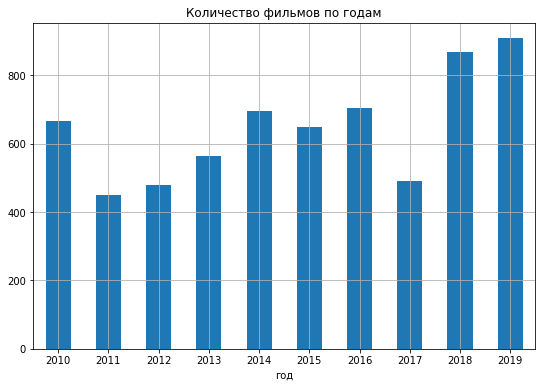

In [156]:
# посмотрим на количество фильмов, вышедших в разных годах
movies.pivot_table(
    index='year',
    values='title',
    aggfunc='count'
).plot(
    kind='bar',
    figsize=(9, 6),
    rot=0,
    title='Количество фильмов по годам',
    xlabel='год',
    legend=False,
    grid=True
);

В целом видна тенденция роста количества выпущенных фильмов. Провал наблюдается в 2017 году.

#### Данные о сборах по годам

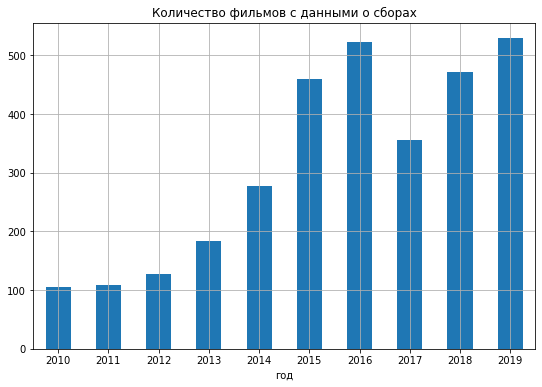

In [194]:
# посмотрим на количество фильмов, для которых имеются данные о сборах в разных годах
movies.pivot_table(
    index='year',
    values='box_office',
    aggfunc='count'
).plot(
    kind='bar',
    figsize=(9, 6),
    rot=0,
    title='Количество фильмов с данными о сборах',
    xlabel='год',
    legend=False,
    grid=True
);

Рассчитаем, какую долю от общего числа фильмов составляют фильмы, для которых есть данные о сборах 

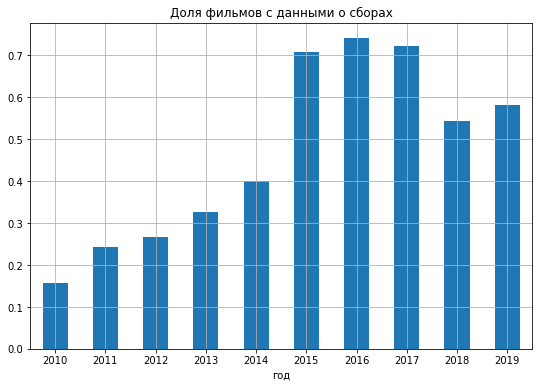

In [158]:
(
    movies.groupby('year')['box_office'].count() 
    / movies.groupby('year')['title'].count()
).plot(
    kind='bar',
    figsize=(9, 6),
    rot=0,
    title='Доля фильмов с данными о сборах',
    xlabel='год',
    legend=False,
    grid=True
);

Меньше половины фильмов, вышедших до 2014 года, имеют данные о сборах.

Полнее всего в данных представлен период с 2015 по 2017 гг.

#### Динамика проката по годам

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

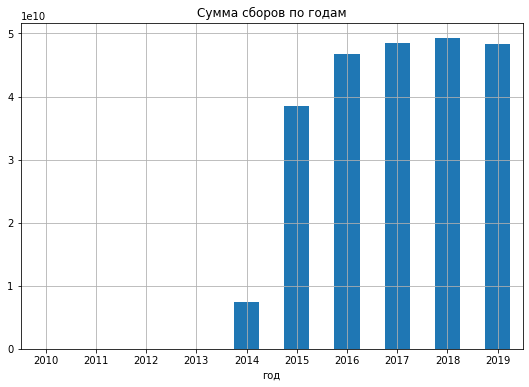

In [159]:
# рассчитаем общую сумму сборов по годам
movies.pivot_table(
    index='year',
    values='box_office',
    aggfunc='sum'
).plot(
    kind='bar',
    figsize=(9, 6),
    rot=0,
    title='Сумма сборов по годам',
    xlabel='год',
    legend=False,
    grid=True
);

In [160]:
movies.pivot_table(
    index='year',
    values='box_office',
    aggfunc='sum'
)

box_office
year              
2010  2.428654e+06
2011  1.410276e+07
2012  6.955423e+06
2013  2.979971e+07
2014  7.434718e+09
2015  3.852783e+10
2016  4.674232e+10
2017  4.845815e+10
2018  4.925199e+10
2019  4.827810e+10

Сумма сборов (по имеющимся данным) была минимальной в 2010 г. Максимальной – в 2018.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [161]:
# рассчитаем среднюю и медианную сумму сборов для каждого года
mean_median = movies.pivot_table(
    index='year',
    values='box_office',
    aggfunc=['mean', 'median']
)
mean_median

mean      median
        box_office  box_office
year                          
2010  2.313004e+04     1700.00
2011  1.293832e+05     3000.00
2012  5.433924e+04     5660.00
2013  1.619549e+05     3522.50
2014  2.674359e+07    18137.50
2015  8.393862e+07  4784781.50
2016  8.937345e+07  3776087.56
2017  1.365018e+08  9919415.00
2018  1.045690e+08  8751895.75
2019  9.126295e+07  4601033.60

In [162]:
# переименуем столбцы (избавимся от мультииндекса)
mean_median.columns = ['mean', 'median']

In [163]:
# посчитаем отклонение среднего значения сборов за год от медианного
mean_median['difference'] = mean_median['mean'] - mean_median['median']
mean_median

mean      median    difference
year                                        
2010  2.313004e+04     1700.00  2.143004e+04
2011  1.293832e+05     3000.00  1.263832e+05
2012  5.433924e+04     5660.00  4.867924e+04
2013  1.619549e+05     3522.50  1.584324e+05
2014  2.674359e+07    18137.50  2.672545e+07
2015  8.393862e+07  4784781.50  7.915384e+07
2016  8.937345e+07  3776087.56  8.559737e+07
2017  1.365018e+08  9919415.00  1.265824e+08
2018  1.045690e+08  8751895.75  9.581709e+07
2019  9.126295e+07  4601033.60  8.666192e+07

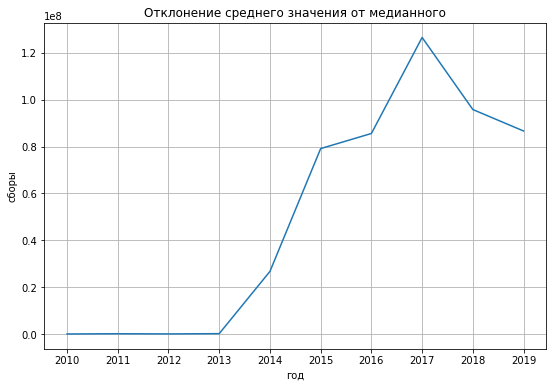

In [164]:
mean_median['difference'].plot(
    figsize=(9, 6),
    grid=True,
    xticks=[x for x in range(2010, 2020)],
    title='Отклонение среднего значения от медианного',
    xlabel='год',
    ylabel='сборы'
);

Среднее значение по выборке более чувствительно к наличию экстремальных значений, чем медианное. То, что мы видим рост отклонения среднего от медианного говорит о том, что после 2013 года в данных появляются фильмы (и их число растет) с очень высокими прокатными сборами. 

#### Анализ фильмов по группам возрастных ограничений

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

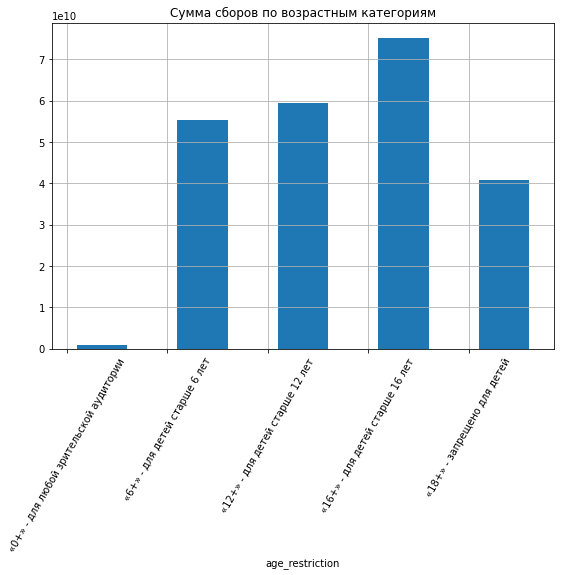

In [165]:
# посчитаем сумму сборов по возрастным категориям
movies.query(
    'year >= 2015'
).pivot_table(
    index='age_restriction',
    values='box_office',
    aggfunc='sum'
).plot(
    kind='bar',
    figsize=(9, 6),
    rot=60,
    position=-0.2,
    title='Сумма сборов по возрастным категориям',
    legend=False,
    grid=True
);

Больше всего в прокате собрали фильмы категории «16+»

In [166]:
# посчитаем сумму сборов по годам в разных возрастных категориях
movies.query(
        'year >= 2015'
).pivot_table(
    index='age_restriction',
    columns='year',
    values='box_office',
    aggfunc='sum'
)

year                                            2015          2016  \
age_restriction                                                      
«0+» - для любой зрительской аудитории  3.790546e+08  1.502288e+08   
«6+» - для детей старше 6 лет           8.517312e+09  1.205315e+10   
«12+» - для детей старше 12 лет         1.341951e+10  1.115076e+10   
«16+» - для детей старше 16 лет         1.078160e+10  1.659425e+10   
«18+» - запрещено для детей             5.430351e+09  6.793930e+09   

year                                            2017          2018  \
age_restriction                                                      
«0+» - для любой зрительской аудитории  2.295989e+08  3.244900e+07   
«6+» - для детей старше 6 лет           1.203103e+10  9.913759e+09   
«12+» - для детей старше 12 лет         7.851428e+09  1.426729e+10   
«16+» - для детей старше 16 лет         1.869459e+10  1.627841e+10   
«18+» - запрещено для детей             9.651496e+09  8.760086e+09   

year                                            2019  
age_restriction                                       
«0+» - для любой зрительской аудитории  1.774607e+07  
«6+» - для детей старше 6 лет           1.270494e+10  
«12+» - для детей старше 12 лет         1.268020e+10  
«16+» - для детей старше 16 лет         1.275342e+10  
«18+» - запрещено для детей             1.012180e+10

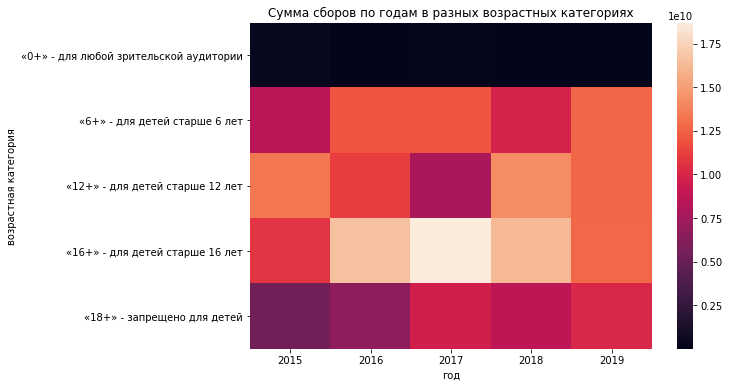

In [167]:
# для большей наглядности построим тепловую карту
plt.figure(figsize=(9, 6))
chart = sns.heatmap(
    movies.query(
        'year >= 2015'
    ).pivot_table(
        index='age_restriction',
        columns='year',
        values='box_office',
        aggfunc='sum'
)
)
chart.set_title("Сумма сборов по годам в разных возрастных категориях")
plt.xlabel("год")
plt.ylabel("возрастная категория");

По годам картина меняется незначительно. В целом, фильмы с самыми высокими кассовыми сборами – это фильмы категории «16+». Меньше всего прибыли приносят фильмы «0+», скорее всего это связано с тем, что детей от 0 до 6 реже приводят в кинотеатры, так как они не могут долго сидеть на одном месте. Ниже сборы у фильмов категории «18+», но со временем годовые сборы этой категории растут. Это говорит о росте интереса к подобным фильмам.

Посмотрим, как менялось количество выпущенных фильмов в зависимости от возрастной категории.

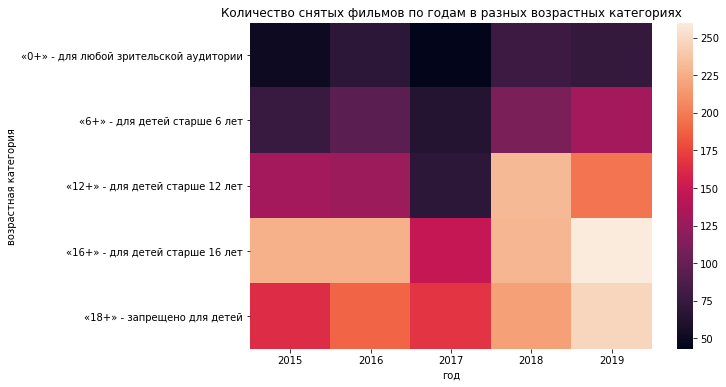

In [168]:
plt.figure(figsize=(9, 6))
chart = sns.heatmap(
    movies.query(
        'year >= 2015'
    ).pivot_table(
        index='age_restriction',
        columns='year',
        values='title',
        aggfunc='count'
)
)
chart.set_title("Количество снятых фильмов по годам в разных возрастных категориях")
plt.xlabel("год")
plt.ylabel("возрастная категория");

Видим, что в целом с годами растет общее количество снятых фильмов. Больше всего снято фильмов в категории «16+». Одновременно с этим растет число фильмов «18+».

#### Связь между рейтингом, бюджетом и сборами фильмов

Посмотрим, влияет ли бюджет фильма на его рейтинг

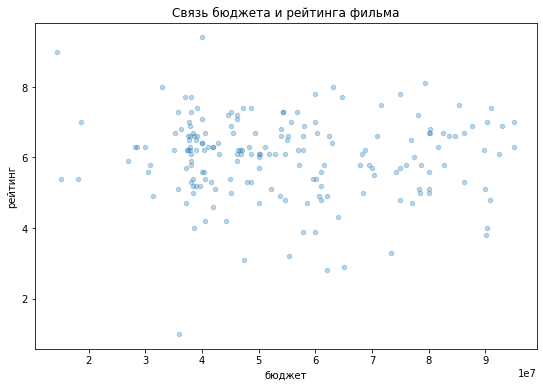

In [169]:
movies.query('budget < 10**8').plot(
    x='budget',
    y='ratings',
    kind='scatter',
    alpha=0.3,
    figsize=(9, 6),
    title = 'Связь бюджета и рейтинга фильма',
    xlabel='бюджет',
    ylabel='рейтинг'
);

In [170]:
movies['ratings'].corr(movies['budget'])

0.09303204225126113

Коэффициент корреляции близок к нулю, облако точек на графике растянуто параллельно оси абсцисс, следовательно, связь между бюджетом и рейтингом фильма отсутствует.

Посмотрим, есть ли связь между рейтингом и кассовыми сборами фильма

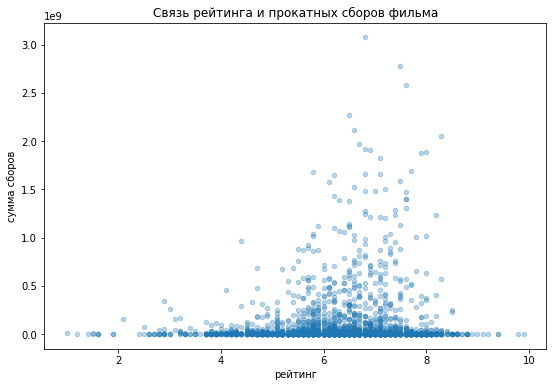

In [171]:
movies.plot(
    x='ratings',
    y='box_office',
    kind='scatter',
    alpha=0.3,
    figsize=(9, 6),
    title = 'Связь рейтинга и прокатных сборов фильма',
    xlabel='рейтинг',
    ylabel='сумма сборов'
);

In [172]:
movies['ratings'].corr(movies['box_office'])

0.08833075504297304

Коэффициент корреляции близок к нулю, облако точек на графике в основном растянуто вдоль оси абсцисс, следовательно, количество сборов и рейтинг фильма слабо связаны между собой. 

Тем не менее, среди фильмов с высоким рейтингом чаще встречаются те, которые принесли большие прокатные сборы (это видно по количеству точек, поднявшихся над осью Ох, их больше для фильмов с рейтингом выше 6).

Посмотрим, есть ли связь между бюджетом и кассовыми сборами фильма

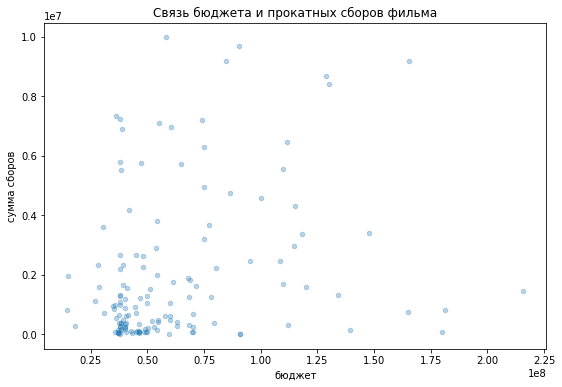

In [173]:
movies.query('box_office < 10**7').plot(
    x='budget',
    y='box_office',
    kind='scatter',
    alpha=0.3,
    figsize=(9, 6),
    title = 'Связь бюджета и прокатных сборов фильма',
    xlabel='бюджет',
    ylabel='сумма сборов'
);

In [174]:
movies['box_office'].corr(movies['budget'])

0.37527648334418384

Между количеством вложенных и собранных средств прослеживается связь, но она не очень сильна – коэффициент Пирсона положительный, но составляет только 0,38. Это значит, что более дорогостоящие фильмы могут приносить большой доход, но так бывает не всегда.

#### Итоги исследовательского анализа данных

Исследовательский анализ показал, что присутствует тенденция роста количества выпущенных фильмов.

Начиная с 2015 года резко увеличилась доля фильмов, для которых хранятся данные о сборах. Возможно это связано с более широким привлечением технологий искусственного интеллекта для исследования киноиндустрии с целью оптимизации затрат и прогнозирования наиболее прибыльных направлений для инвестиций.

Сумма сборов (по имеющимся данным) была минимальной в 2010 г, максимальной – в 2018.

Сравнение среднего и медианного значений кассовых сборов по годам говорит о том, что после 2013 года в данных появляются фильмы (и их число растет) с очень высокими прокатными сборами.

Анализ фильмов по возрастным категориям показал, что больше всего снято фильмов в категории «16+». Это связано с тем, что фильмы с самыми высокими кассовыми сборами – это фильмы категории «16+». Одновременно с этим растет число фильмов «18+», также со временем растут годовые сборы этой категории. Меньше всего прибыли приносят фильмы «0+», скорее всего это связано с тем, что детей от 0 до 6 реже приводят в кинотеатры, так как они не могут долго сидеть на одном месте. 

Анализ связи между рейтингом, бюджетом и сборами фильмов показал, что рейтинг очень слабо коррелирует и с количеством вложенных в производство фильма средств и с количеством собранных в прокате денег. То есть высокие затраты и прибыли не гарантируют высокую оценку фильма зрителями. Тем не менее, среди фильмов с высоким рейтингом чаще встречаются те, которые принесли большие прокатные сборы.

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

#### Общие числовые характристики

In [175]:
# посмотрим, сколько фильмов выпущено в России
movies[movies['production_country'].str.contains("Россия")].shape[0]

1924

In [176]:
# посмотрим, сколько из них получили господдержку
gov = movies.query('financing_source.notna()')
gov.shape

(314, 20)

In [177]:
# посмотрим, какую долю от бюджета составляют деньги господдержки
movies.query('budget.notna()')['gov_share'].describe()

count    314.000000
mean       0.517347
std        0.170313
min        0.044043
25%        0.373296
50%        0.592714
75%        0.656978
max        0.784745
Name: gov_share, dtype: float64

В предоставленных данных имеются сведения о 1924 фильмах, снятых в России. Доля получивших господдержку при съёмках составляет 16%. 

В среднем доля господдержки составляет 59% от общего бюджета фильма. Максимальная доля господдержки – 78 %.

#### Динамика государственного финансирования по годам

In [178]:
# посмотрим, как менялocь количество государственных средств по годам
pd.options.mode.chained_assignment = None
gov['total_support'] = gov['refundable_support'] + gov['nonrefundable_support']

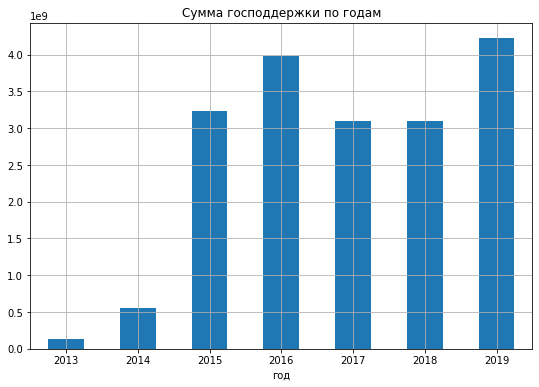

In [179]:
gov.pivot_table(
    index='year',
    values='total_support',
    aggfunc='sum'
).plot(
    kind='bar',
    figsize=(9, 6),
    rot=0,
    position=0.5,
    title='Сумма господдержки по годам',
    legend=False,
    grid=True,
    xlabel='год'
);

Видим, что число государственных средств, выделяемых на поддержку фильмов, растет после 2014 года. Небольшое снижение финансирования наблюдается в 2017 и 2018 гг.

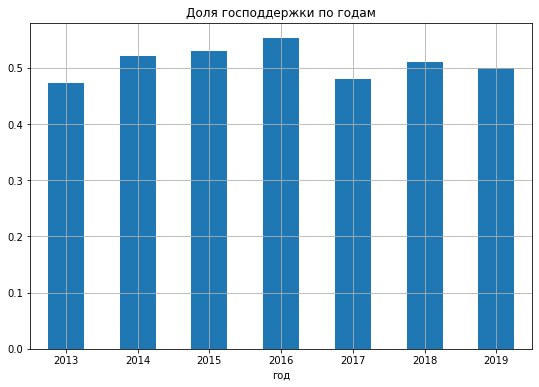

In [180]:
# посмотрим, как менялась доля господдержки по годам
gov.pivot_table(
    index='year',
    values='gov_share',
    aggfunc='mean'
).plot(
    kind='bar',
    figsize=(9, 6),
    rot=0,
    position=0.5,
    title='Доля господдержки по годам',
    legend=False,
    grid=True,
    xlabel='год'
);

Доля господдержки меняется с годами незначительно. Значения колеблются около отметки в 50% бюджета фильма.

#### Виды фильмов, получающих господдержку чаще других

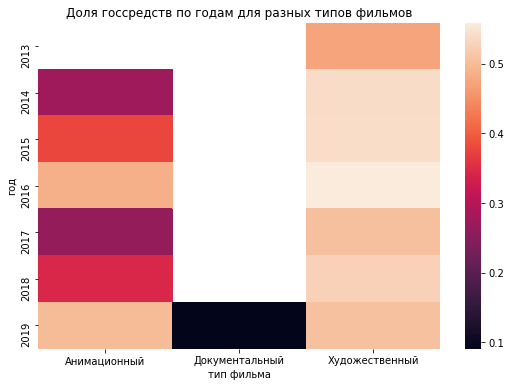

In [181]:
# посчитаем, как изменялась доля госсредств по годам для разных типов фильмов
plt.figure(figsize=(9, 6))

chart = sns.heatmap(
    gov.pivot_table(
    index='year',
    columns='type',
    values='gov_share',
    aggfunc='mean'
)
)
chart.set_title("Доля госсредств по годам для разных типов фильмов")
plt.xlabel("тип фильма")
plt.ylabel("год");

Выше всего доля государственных средств в бюджете у художественных и анимационных фильмов. В 2019 году появляются документальные фильмы с привлечением средств господдержки, но доля государственных денег от бюджета фильма невелика.

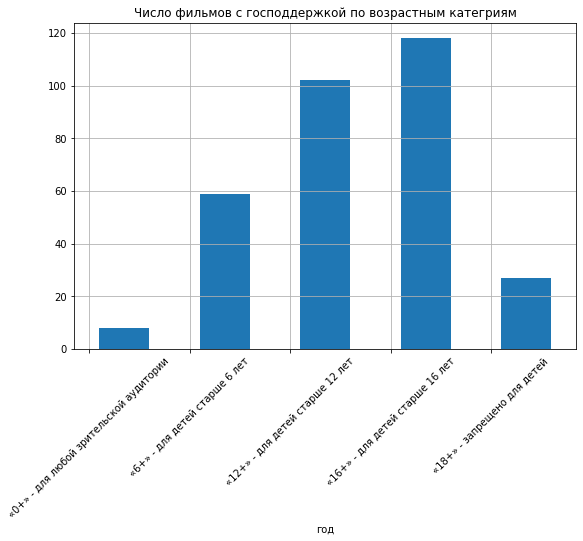

In [182]:
# посчитаем число фильмов с господдержкой по возрастным категриям
gov.pivot_table(
    index='age_restriction',
    values='gov_share',
    aggfunc='count'
).plot(
    kind='bar',
    figsize=(9, 6),
    rot=45,
    position=-0.2,
    title='Число фильмов с господдержкой по возрастным категриям',
    legend=False,
    grid=True,
    xlabel='год'
);

Чаще всего получают поддержку фильмы категорий «16+», «12+» и «6+».

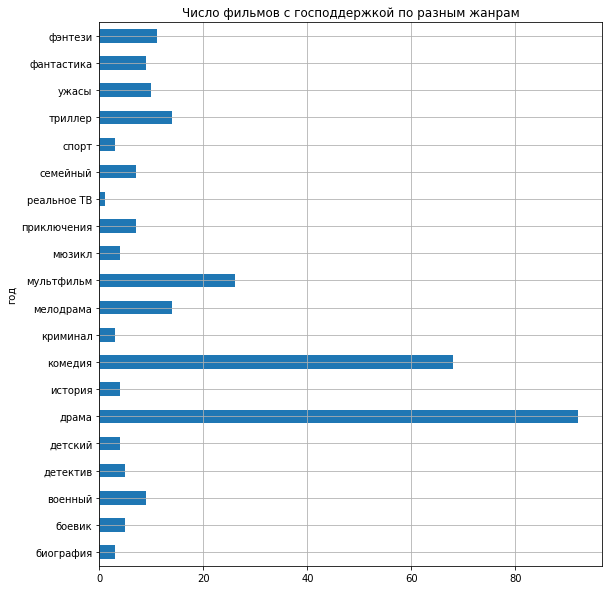

In [183]:
# посчитаем число фильмов с господдержкой по разным жанрам
gov.pivot_table(
    index='head_genre',
    values='gov_share',
    aggfunc='count'
).plot(
    kind='barh',
    figsize=(9, 10),
#     rot=45,
    position=0.5,
    title='Число фильмов с господдержкой по разным жанрам',
    legend=False,
    grid=True,
    xlabel='год'
);

Чаще всего средства выделяются на драму, комедию и мультфильмы.

#### Рейтинг фильмов с господдержкой

Посмотрим, какой рейтинг получают фильмы с господдержкой.

In [184]:
# посмотрим, какой средний рейтинг у иностранных фильмов
movies.query('not production_country.str.contains("Россия")')['ratings'].mean()

6.536472849591543

In [185]:
# посмотрим, какой средний рейтинг у российских фильмов без господдержки
movies.query('financing_source.isna() and production_country.str.contains("Россия")')['ratings'].mean()

6.183458646616542

In [186]:
# посмотрим, какой средний рейтинг у фильмов, получивших господдержку
gov['ratings'].mean()

6.037792642140468

Видим, что самый высокий средний рейтинг – у фильмов иностранного производства. На втором месте – отечественное кино без господдержки. У фильмов, получивших государственную помощь, рейтинг самый низкий.

На КиноПоиске можно прочитать, что Министерство культуры финансирует дебюты, авторское, документальное и детское кино, то есть проекты, которые могут быть неуспешны в прокате, но имеют культурную значимость или фестивальный потенциал. Такие фильмы – пища для ума, круг зрителей у них уже. Этим отчасти можно объяснить низкий рейтинг фильмов с господдержкой.

Изучим рейтинг фильмов с господдержкой подробнее.

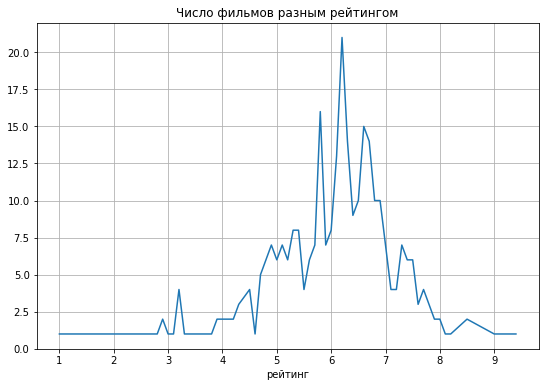

In [187]:
# построим график числа фильмов с определенным рейтингом
gov.pivot_table(
    index='ratings',
    values='title',
    aggfunc='count'
).plot(
    figsize=(9, 6),
    xticks=[x for x in range(1, 10)],
    grid=True,
    title='Число фильмов разным рейтингом',
    legend=False,
    xlabel='рейтинг'
);

In [188]:
# посмотрим описание столбца с данными о рейтинге
gov['ratings'].describe()

count    299.000000
mean       6.037793
std        1.160946
min        1.000000
25%        5.400000
50%        6.200000
75%        6.700000
max        9.400000
Name: ratings, dtype: float64

In [189]:
# рассчитаем долю фильмов с рейтингом ниже 5 баллов
gov.query('ratings < 5').shape[0] / gov.shape[0] * 100

14.64968152866242

In [190]:
# рассчитаем долю фильмов с рейтингом выше 8 баллов
gov.query('ratings >= 8').shape[0] / gov.shape[0] * 100

2.547770700636943

У фильмов, получивших государственную помощь, рейтинг ниже, чем у фильмов, снятых без привлечения госсредств. Большинство фильмов имеют рейтинг 6 баллов. Фильмы, которым зрители присвоили рейтинг ниже 5 баллов составляют менее 15 % от общего числа фильмов, получивших госфинансирование. Фильмов с оценкой выше 8 баллов меньше 3 %. 

#### Окупаемость фильмов с господдержкой

In [191]:
# вычислим, у какого количества фильмов прокатные сборы превысили бюджет
gov.query('box_office >= budget').shape[0]

66

In [192]:
# какой это процент от общего числа фильмов, получивших госфинансирование
gov.query('box_office >= budget').shape[0] / gov.shape[0] * 100

21.019108280254777

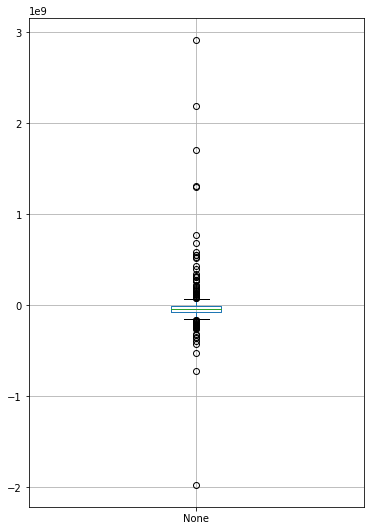

In [193]:
# посмотрим на данные о разнице между прокатными сборами и бюджетом фильмов
(
    gov['box_office'] - gov['budget']
).plot(kind='box', grid=True, figsize=(6, 9));

Видим, что окупились только 21 % фильмов, получивших господдержку. Основная масса фильмов оказалась убыточной.

#### Итоги анализа данных о фильмах, получивших господдержку

В предоставленных данных имеются сведения о 1924 фильмах, снятых в России. Доля получивших господдержку при съёмках составляет 16%. 

Видим, что число государственных средств, выделяемых на поддержку фильмов, растет после 2014 года. Небольшое снижение финансирования наблюдается в 2017 и 2018 гг.

Доля господдержки меняется с годами незначительно. Значения колеблются около отметки в 50% бюджета фильма, в среднем доля господдержки составляет 59% от общего бюджета фильма. Максимальная доля господдержки – 78 %. 

Выше всего доля государственных средств в бюджете у художественных и анимационных фильмов. В 2019 году появляются документальные фильмы с привлечением средств господдержки, но доля государственных денег от бюджета фильма невелика. 

Чаще всего средства выделяются на драму, комедию и мультфильмы. Возрастные категории, получающие поддержку, это категории «16+», «12+» и «6+».

У фильмов, получивших государственную помощь, рейтинг ниже, чем у фильмов, снятых без привлечения госсредств. Большинство фильмов имеют рейтинг 6 баллов. Фильмы, которым зрители присвоили рейтинг ниже 5 баллов составляют менее 15 % от общего числа фильмов, получивших госфинансирование. Фильмов с оценкой выше 8 баллов меньше 3 %.

Окупаемость фильмов, получивших господдержку, низкая. Видим, что окупились только 21 % фильмов. Для основной массы фильмов разница между размерами кассовых сборов и затратами на производство отрицательная.

### Шаг 5. Напишите общий вывод

Данные собраны в один датасет из двух источников: отдельно хранились сведения из реестра прокатных удостоверений, и отдельно – сведения о показе фильмов в российских кинотеатрах. 

В ходе <u>предобработки</u> данных мы обработали аномальные значения. Там, где это было возможно, заполнили пропуски. При обработке дубликатов очистили названия фильмов от печаток. При наличии нескольких однотипных наименований внутри одной ячейки первые значения вынесены в отдельные столбцы. Удалили неинформативные строки и строки с недостоверными данными.

<u>Исследовательский анализ</u> показал, что присутствует тенденция роста количества выпущенных фильмов.

Начиная с 2015 года резко увеличилась доля фильмов, для которых хранятся данные о сборах. Возможно это связано с более широким привлечением технологий искусственного интеллекта для исследования киноиндустрии с целью оптимизации затрат и прогнозирования наиболее прибыльных направлений для инвестиций.

Сумма сборов (по имеющимся данным) была минимальной в 2010 г, максимальной – в 2018.

Сравнение среднего и медианного значений кассовых сборов по годам говорит о том, что после 2013 года в данных появляются фильмы (и их число растет) с очень высокими прокатными сборами.

Анализ фильмов по возрастным категориям показал, что больше всего снято фильмов в категории «16+». Это связано с тем, что фильмы с самыми высокими кассовыми сборами – это фильмы категории «16+». Одновременно с этим растет число фильмов «18+», также со временем растут годовые сборы этой категории. 

Анализ связи между рейтингом, бюджетом и сборами фильмов показал, что рейтинг очень слабо коррелирует и с количеством вложенных в производство фильма средств и с количеством собранных в прокате денег. То есть высокие затраты и прибыли не гарантируют высокую оценку фильма зрителями. Тем не менее, среди фильмов с высоким рейтингом чаще встречаются те, которые принесли большие прокатные сборы.

Между количеством вложенных и собранных средств прослеживается связь, но она не очень сильна. Это значит, что более дорогостоящие фильмы могут приносить больший доход, но так бывает не всегда.

Было проведено отдельное <u>исследование фильмов, получивших государственную поддержку</u>.

В предоставленных данных имеются сведения о 1924 фильмах, снятых в России. Доля получивших господдержку при съёмках составляет 16%. 

Видим, что число государственных средств, выделяемых на поддержку фильмов, растет после 2014 года. Доля господдержки меняется с годами незначительно. Значения колеблются около отметки в 50% бюджета фильма. 

Выше всего доля государственных средств в бюджете у художественных и анимационных фильмов. В 2019 году появляются документальные фильмы с привлечением средств господдержки, но доля государственных денег в бюджете фильма невелика. 

Чаще всего средства выделяются на драму, комедию и мультфильмы. Возрастные категории, получающие поддержку, это категории «16+», «12+» и «6+».

У фильмов, получивших государственную помощь, рейтинг ниже, чем у фильмов, снятых без привлечения госсредств. Большинство фильмов имеют рейтинг 6 баллов. Фильмы, которым зрители присвоили рейтинг ниже 5 баллов составляют менее 15 % от общего числа фильмов, получивших госфинансирование. 

Окупаемость фильмов, получивших господдержку, низкая. Видим, что прокатные сборы превысили затраты на производство только у 21 % фильмов. 